# <center><span style="color:black"> Kaggle challenge - Statistical learning and Big data </style></center>
## <center><span style="color:black"> Predict HIV Virological Failure (VF)</style></center>
###  <center><span style="color:black"> Student : Khalil Zlaoui </style></center>

# Kaggle challenge description

Predict whether an HIV-infected patient receiving antiretroviral therapy (ART) is experiencing a virological failure based on information from electronic medical records. Plasma viral load (PVL) measures the amount of HIV circulating inside the patient's body. Virological failure is defined as PVL being greater than 100 copies/mL (i.e.,​ PVL_Count_Now>100), which suggests that ART is no longer effective in suppressing HIV replication.

Your goal is to predict whether a virological failure occurs based on the basic demographic and clinical information that is available.

Let's start by exploring the data

# Exploratory analysis

In [1]:
Train=read.csv("train.csv")
Train$VF=ifelse(Train$PVL_Count_Now>100,1,0)
Train$VF=as.factor(Train$VF)

# Data cleaning
Train$gender=ifelse(Train$gender=="M",1,0)
Train$education=ifelse(Train$education=="< high school",0,ifelse(Train$education=="high school",1,2))

Train$test3=ifelse(Train$test3=="Positive",1,0)
Train$test4=ifelse(Train$test4=="Positive",1,0)
Train$test5=ifelse(Train$test5=="Positive",1,0)
Train$test6=ifelse(Train$test6=="Positive",1,0)
Train$test7=ifelse(Train$test7=="Positive",1,0)
Train$test8=ifelse(Train$test8=="Positive",1,0)
Train$test9=ifelse(Train$test9=="Positive",1,0)
Train$test10=ifelse(Train$test10=="Positive",1,0)


head(Train)

ID,PVL_Count_Now,CD4_count_Now,CD4Count_6months_ago,test1,test2,CD4Percent_Now,CD4perc_6months_ago,age,TimeOnTherapy,⋯,education,test3,test4,test5,test6,test7,test8,test9,test10,VF
1,4,604,310,233,65,18.1,18.0,39.4,4.2,⋯,1,0,0,0,0,1,0,0,1,0
2,33681,667,548,140,74,45.2,26.2,38.8,2.8,⋯,1,0,1,1,0,0,0,0,1,1
3,33,338,326,141,4,27.2,24.5,35.1,3.3,⋯,2,1,1,1,0,0,1,0,0,0
4,449,558,250,119,53,38.1,20.4,34.5,6.6,⋯,0,0,0,1,1,0,1,1,1,1
5,479,629,585,99,50,33.3,24.3,19.3,4.2,⋯,0,0,1,0,0,0,0,0,1,1
6,8,666,645,149,33,24.8,20.7,17.3,2.3,⋯,0,0,1,0,1,1,0,1,0,0


In [2]:
Train=Train[sample(nrow(Train)),]
head(Train)

,ID,PVL_Count_Now,CD4_count_Now,CD4Count_6months_ago,test1,test2,CD4Percent_Now,CD4perc_6months_ago,age,TimeOnTherapy,⋯,education,test3,test4,test5,test6,test7,test8,test9,test10,VF
4687,4687,76,498,500,239,27,18.0,14.5,31.1,6.0,⋯,2,0,1,1,0,0,1,0,0,0
4751,4751,14,893,626,126,49,34.9,35.5,45.2,5.3,⋯,1,0,0,1,0,0,1,0,1,0
1509,1509,56,185,153,143,52,13.8,6.6,28.2,2.5,⋯,0,0,0,0,0,1,0,1,1,0
4759,4759,1,312,452,98,82,38.0,30.7,32.9,2.6,⋯,0,0,0,0,1,1,0,1,1,0
426,426,39,420,400,243,107,13.1,13.9,33.4,4.4,⋯,0,0,1,1,1,0,1,0,1,0
1177,1177,8,645,755,135,17,14.6,9.7,46.8,2.7,⋯,0,1,1,0,1,1,0,1,0,0


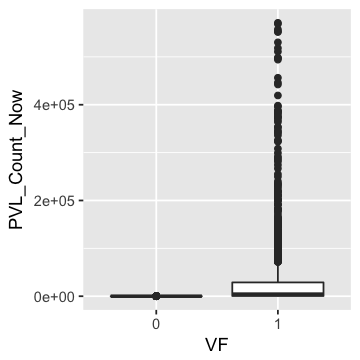

In [3]:
# Exploratory plots
library(ggplot2)

options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,PVL_Count_Now))
plot1+geom_boxplot()

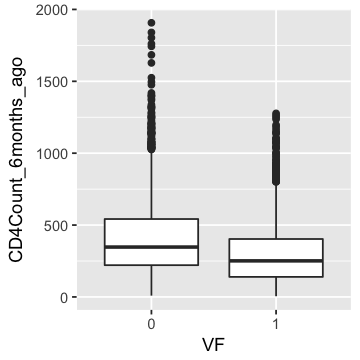

In [4]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,CD4Count_6months_ago))
plot1+geom_boxplot()

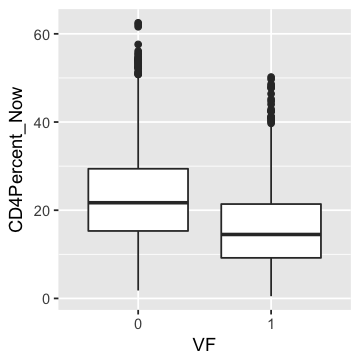

In [5]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,CD4Percent_Now))
plot1+geom_boxplot()

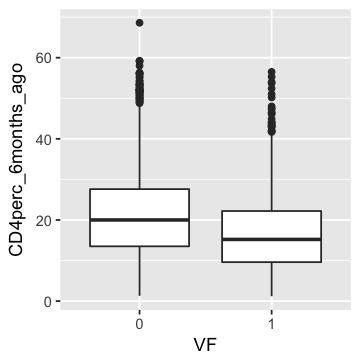

In [6]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,CD4perc_6months_ago))
plot1+geom_boxplot()

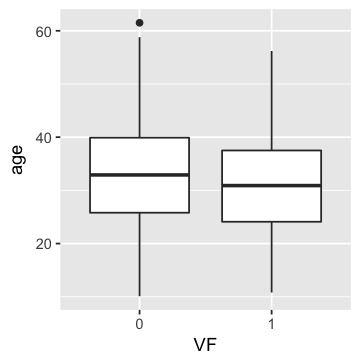

In [7]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,age))
plot1+geom_boxplot()

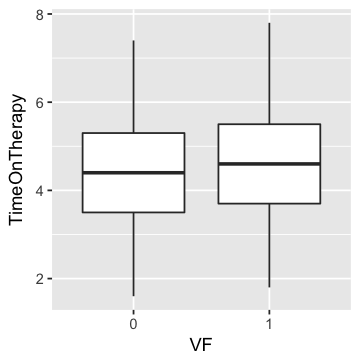

In [8]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,TimeOnTherapy))
plot1+geom_boxplot()

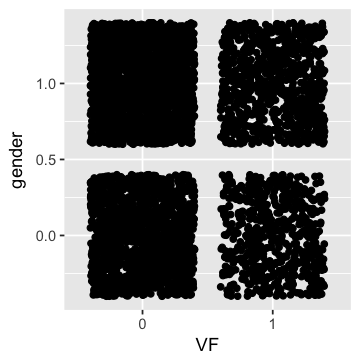

In [9]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,gender))
plot1+geom_jitter()

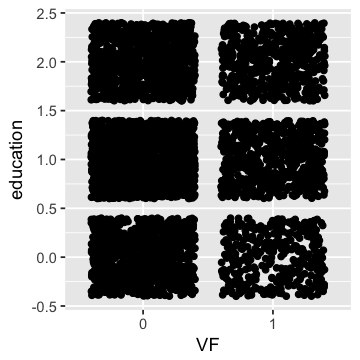

In [10]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,education))
plot1+geom_jitter()

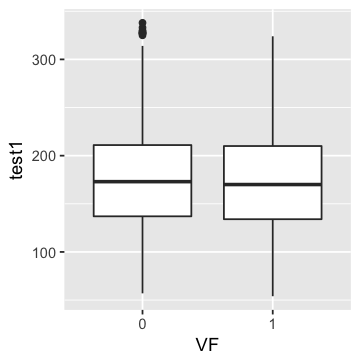

In [11]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,test1))
plot1+geom_boxplot()

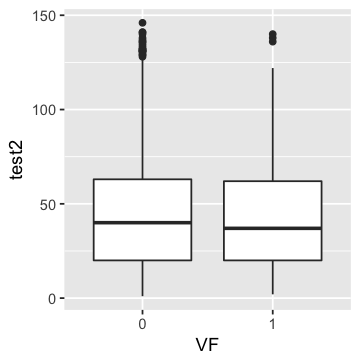

In [12]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,test2))
plot1+geom_boxplot()

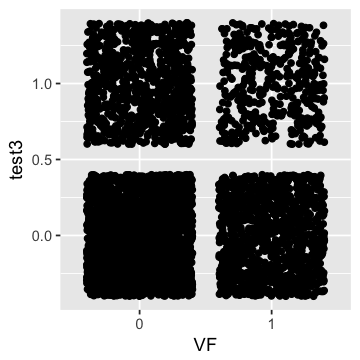

In [13]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,test3))
plot1+geom_jitter()

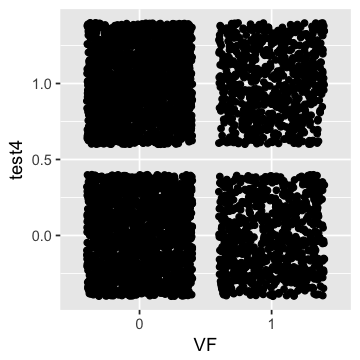

In [14]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,test4))
plot1+geom_jitter()

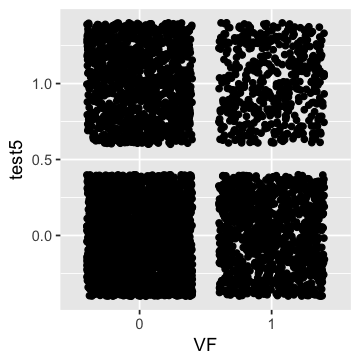

In [15]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,test5))
plot1+geom_jitter()

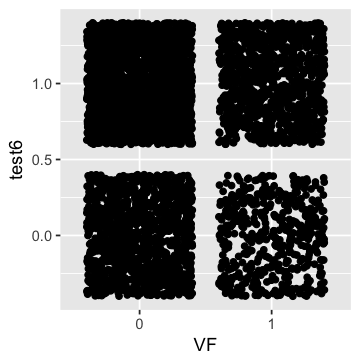

In [16]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,test6))
plot1+geom_jitter()

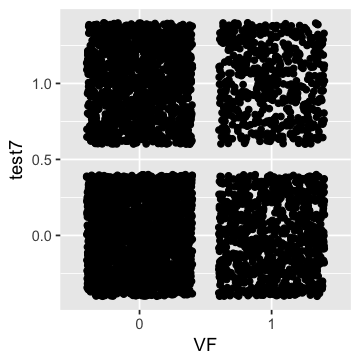

In [17]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,test7))
plot1+geom_jitter()

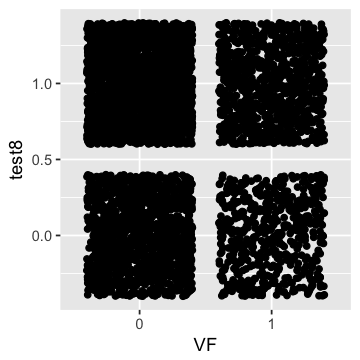

In [18]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,test8))
plot1+geom_jitter()

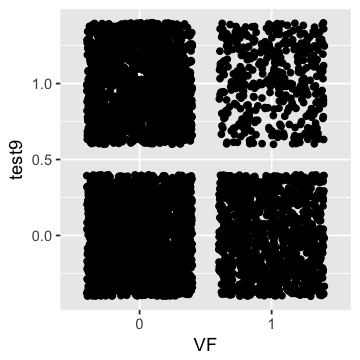

In [89]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,test9))
plot1+geom_jitter()

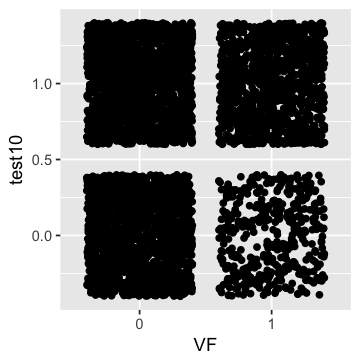

In [90]:
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Train, aes(VF,test10))
plot1+geom_jitter()

It looks like some variables are not very good at distinguishing VF. We might gain precision using feature engineering. We will look at most important predictors using random forests. Let's format the data first.

# Formatting and standardizing the data

In [4]:
outcomecol=ncol(Train)
Train2 = lapply(Train,as.numeric)
Train.df = as.data.frame(Train2)

Train.df$VF[Train.df$VF == 1] = 0
Train.df$VF[Train.df$VF == 2] = 1

set.seed(13)

trainsample=sample(nrow(Train.df),3800,replace=FALSE)
trainsample=trainsample

TrainofTrain.X=Train.df[trainsample,-c(1,2,outcomecol)]
TestofTrain.X=Train.df[-trainsample,-c(1,2,outcomecol)]

TrainofTrain.Y=Train.df[trainsample,outcomecol]
TestofTrain.Y=Train.df[-trainsample,outcomecol]

scaled=scale(TrainofTrain.X)
Trainset=cbind(scaled,TrainofTrain.Y)
Trainset=as.data.frame(Trainset)
colnames(Trainset)[19]="VF"
#Trainset$VF<-as.factor(Trainset$VF)

scaled=scale(TestofTrain.X)
Testset=cbind(scaled,TestofTrain.Y)
Testset=as.data.frame(Testset)
colnames(Testset)[19]="VF"
#Testset$VF<-as.factor(Testset$VF)

#summary(TrainofTrain.X)
head(Trainset)
head(Testset)
#nrow(Trainset)
#nrow(Testset)

,CD4_count_Now,CD4Count_6months_ago,test1,test2,CD4Percent_Now,CD4perc_6months_ago,age,TimeOnTherapy,gender,education,test3,test4,test5,test6,test7,test8,test9,test10,VF
3552,-0.4130239,-0.29071605,0.6412367,0.9033741,0.17786799,0.4071713,1.57514892,-0.4665724,-1.179438,-0.04979122,-0.6036195,-1.0281596,-0.6971288,-1.4145858,1.2429016,-1.2821721,-0.8025835,-1.2185621,0
1231,1.1337791,0.14531118,0.7775022,-0.9610138,0.09146421,-0.3146918,0.65657896,0.7642044,0.847638,1.29209990,1.6562368,0.9723557,1.4340776,-1.4145858,-0.8043572,-1.2821721,-0.8025835,0.8204234,1
1948,-1.0934590,-1.04676325,-0.8771502,-1.3407965,-0.28295216,-0.8825574,0.07700506,1.0103598,-1.179438,-0.04979122,1.6562368,-1.0281596,1.4340776,0.7067347,1.2429016,0.7797213,-0.8025835,0.8204234,1
457,-0.1400586,0.09330793,0.8748347,-1.3753222,2.10755237,2.2262663,-0.77595277,0.1898419,0.847638,1.29209990,-0.6036195,-1.0281596,-0.6971288,-1.4145858,-0.8043572,0.7797213,-0.8025835,-1.2185621,0
4807,1.2999319,0.64934265,0.2129737,1.1450540,1.09950829,0.3782968,0.58003146,1.8308777,0.847638,1.29209990,1.6562368,0.9723557,-0.6971288,0.7067347,-0.8043572,-1.2821721,1.2456484,0.8204234,1
55,0.4216959,-0.74274427,-0.1763562,-1.3407965,1.29151669,0.1665503,-0.30573243,-0.8768313,0.847638,-1.39168235,1.6562368,0.9723557,-0.6971288,0.7067347,-0.8043572,0.7797213,-0.8025835,-1.2185621,0


,CD4_count_Now,CD4Count_6months_ago,test1,test2,CD4Percent_Now,CD4perc_6months_ago,age,TimeOnTherapy,gender,education,test3,test4,test5,test6,test7,test8,test9,test10,VF
4,-0.2893623,0.3104827,-1.4720480,1.2998779,1.68835686,1.0800710,0.08043754,-1.5781846,0.817574,-1.41384397,-0.5771097,-1.079395,-0.7015175,0.713449,1.2435758,-1.2858803,1.2523119,0.8980848,0
6,1.0347320,1.5133886,-0.7640336,-0.9432246,-0.57765565,-0.9577530,1.61802418,-1.4931645,-1.222112,-1.41384397,1.7313290,0.925673,-0.7015175,0.713449,1.2435758,-1.2858803,1.2523119,-1.1125528,0
8,0.1718837,-0.3882349,-0.1516969,-0.9087153,0.05179227,-0.5695961,0.02512866,-0.7279841,0.817574,-1.41384397,-0.5771097,-1.079395,-0.7015175,0.713449,-0.8034626,-1.2858803,1.2523119,-1.1125528,0
14,4.3230984,2.3113558,-0.8405757,-1.4608636,2.29843715,3.0790793,-1.18060475,1.3975170,-1.222112,-1.41384397,1.7313290,-1.079395,1.4242932,0.713449,-0.8034626,0.7770293,1.2523119,-1.1125528,0
15,1.4601917,0.3541526,0.8816214,-1.3918451,1.96918747,-0.7345628,-1.58989040,1.3975170,-1.222112,1.28347362,1.7313290,0.925673,-0.7015175,0.713449,-0.8034626,0.7770293,-0.7978577,-1.1125528,1
18,-0.7863947,-1.1703222,-1.3763704,-0.7706782,-1.20710358,-1.4429492,-0.58326893,-1.5781846,-1.222112,-0.06518518,-0.5771097,-1.079395,-0.7015175,-1.400474,-0.8034626,0.7770293,1.2523119,0.8980848,1


In [7]:
Trainset$VF<-as.factor(Trainset$VF)
Testset$VF<-as.factor(Testset$VF)

Allset=rbind(Trainset,Testset)

Allset.X=Allset[,-ncol(Allset)]
Allset.Y=Allset[,ncol(Allset)]

In [8]:
head(Trainset)

,CD4_count_Now,CD4Count_6months_ago,test1,test2,CD4Percent_Now,CD4perc_6months_ago,age,TimeOnTherapy,gender,education,test3,test4,test5,test6,test7,test8,test9,test10,VF
3552,-0.4130239,-0.29071605,0.6412367,0.9033741,0.17786799,0.4071713,1.57514892,-0.4665724,-1.179438,-0.04979122,-0.6036195,-1.0281596,-0.6971288,-1.4145858,1.2429016,-1.2821721,-0.8025835,-1.2185621,0
1231,1.1337791,0.14531118,0.7775022,-0.9610138,0.09146421,-0.3146918,0.65657896,0.7642044,0.847638,1.29209990,1.6562368,0.9723557,1.4340776,-1.4145858,-0.8043572,-1.2821721,-0.8025835,0.8204234,1
1948,-1.0934590,-1.04676325,-0.8771502,-1.3407965,-0.28295216,-0.8825574,0.07700506,1.0103598,-1.179438,-0.04979122,1.6562368,-1.0281596,1.4340776,0.7067347,1.2429016,0.7797213,-0.8025835,0.8204234,1
457,-0.1400586,0.09330793,0.8748347,-1.3753222,2.10755237,2.2262663,-0.77595277,0.1898419,0.847638,1.29209990,-0.6036195,-1.0281596,-0.6971288,-1.4145858,-0.8043572,0.7797213,-0.8025835,-1.2185621,0
4807,1.2999319,0.64934265,0.2129737,1.1450540,1.09950829,0.3782968,0.58003146,1.8308777,0.847638,1.29209990,1.6562368,0.9723557,-0.6971288,0.7067347,-0.8043572,-1.2821721,1.2456484,0.8204234,1
55,0.4216959,-0.74274427,-0.1763562,-1.3407965,1.29151669,0.1665503,-0.30573243,-0.8768313,0.847638,-1.39168235,1.6562368,0.9723557,-0.6971288,0.7067347,-0.8043572,0.7797213,-0.8025835,-1.2185621,0


# Anomaly detection

In [283]:
install.packages("solitude",dependencies=TRUE)
#library(solitude)

also installing the dependency ‘igraph’

Warning message in install.packages("solitude", dependencies = TRUE):
“installation of package ‘igraph’ had non-zero exit status”Warning message in install.packages("solitude", dependencies = TRUE):
“installation of package ‘solitude’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [284]:
# grow an isolation forest
iso <- isolation_forest(Allset.X, seed = 100, num.trees = 1e3)

# predict anomaly scores (parallelizable using futures)
scores <- predict(iso, Allset.X, type = "anomaly_score")

# predict corrected depths
depths <- predict(iso, Allset.X, type = "depth_corrected")

In [ ]:
Potentially 3 outliers : 4026, 1539 and 1814

In [9]:
NO.Allset=Allset[-c(4026,1754,1832,4889),]

In [10]:
dim(NO.Allset)

[1] 4996   19

# Feature selection using random forests

In [176]:
library(randomForest)
rf=randomForest(VF~.,data=Trainset,mtry=3,importance=TRUE,distribution="bernoulli")

In [177]:
pred=predict(rf,newdata=Testset)
tb=table(pred,Testset$VF)
accuracy = sum(diag(tb))/sum(tb)
tb
accuracy

importance(rf)

    
pred   0   1
   0 778 203
   1  58 161

[1] 0.7825

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
CD4_count_Now,37.978379,43.927608,56.855563,243.03750
CD4Count_6months_ago,21.916915,14.612969,28.810505,159.26006
test1,7.575910,8.215978,11.171921,129.60998
test2,22.475835,15.832686,28.031541,137.36663
CD4Percent_Now,38.093095,35.426711,51.681455,205.74123
CD4perc_6months_ago,21.842524,10.879872,26.349710,146.60889
age,6.036117,13.269992,12.992512,137.42409
TimeOnTherapy,6.218489,7.499138,9.269377,119.23434
gender,6.167685,9.322217,10.139568,24.92546
education,10.846928,17.218907,18.624358,45.33941


# Formatting with variable removal

I tried removing some variables (gender, test4, test7). This did not help. I'll keep all variables in the prediction. Note that the random forests algorithm performs well, so let's carry it further.

In [43]:
#TrainofTrain.X<-TrainofTrain.X[,-c(9,12,15)]
#TestofTrain.X<-TestofTrain.X[,-c(9,12,15)]

In [44]:
#Trainset=cbind(TrainofTrain.X,TrainofTrain.Y)
#Testset=cbind(TestofTrain.X,TestofTrain.Y)

In [45]:
#colnames(Trainset)[16]="VF"
#Trainset$VF<-as.factor(Trainset$VF)

#colnames(Testset)[16]="VF"
#Testset$VF<-as.factor(Testset$VF)

# Random forests with 10-fold repeated C-V

https://machinelearningmastery.com/tune-machine-learning-algorithms-in-r/

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



Random Forest 

5000 samples
  18 predictor
   2 classes: 'sane', 'VF' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4500, 4500, 4500, 4500, 4500, 4501, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   2    0.8400576  0.9592036  0.4060968
   4    0.8342345  0.9418171  0.4749492
   7    0.8259406  0.9325511  0.4910596
   9    0.8235034  0.9299701  0.4961412
  11    0.8219658  0.9287279  0.4970228
  12    0.8203940  0.9264349  0.4945931
  13    0.8196183  0.9269124  0.4979101
  14    0.8197329  0.9255772  0.4985651
  17    0.8171894  0.9216582  0.4972450
  18    0.8164171  0.9220400  0.4970213

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


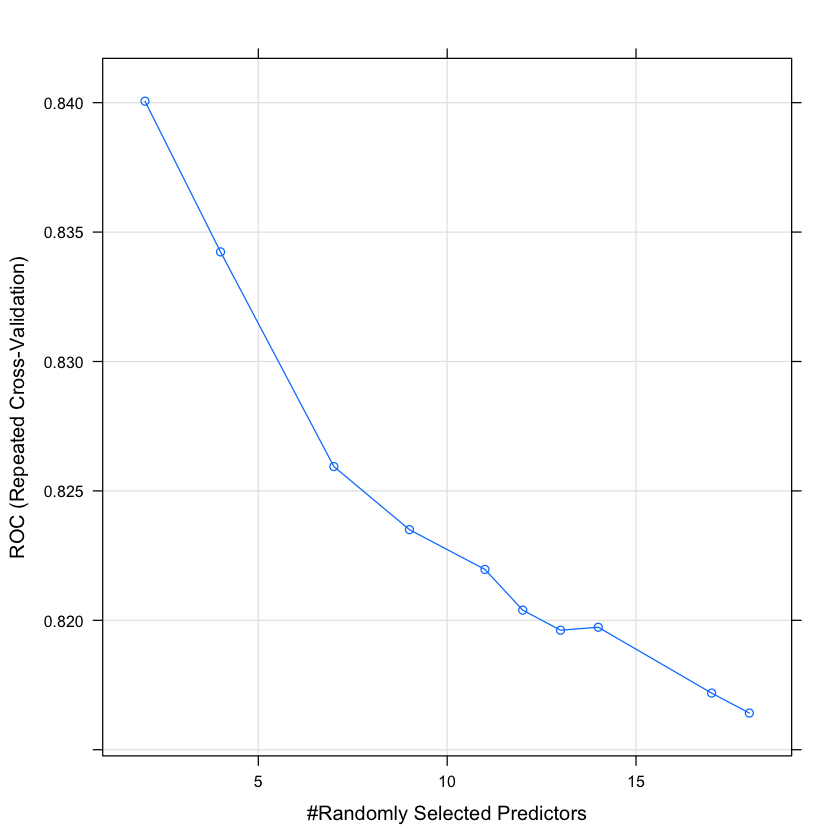

In [126]:
set.seed(1)
library(randomForest)
library(mlbench)
library(caret)

# Random Search
control <- trainControl(method="repeatedcv", number=10, repeats=3, search="random",summaryFunction = twoClassSummary,
                       classProbs = TRUE)
mtry <- sqrt(ncol(Allset.X))
rf_random <- train(VF~., data=Allset, method="rf", metric="ROC", tuneLength=15, trControl=control)
print(rf_random)
plot(rf_random)

# XGBOOST with 10 fold C-V

https://stats.stackexchange.com/questions/171043/how-to-tune-hyperparameters-of-xgboost-trees

In [131]:
#install.packages("xgboost")
library(xgboost)
library(Matrix)

In [132]:
xgb_train = xgb.DMatrix(data=data.matrix(Allset.X), label=Allset.Y)


In [134]:
library(caret)
library(xgboost)
library(readr)
library(dplyr)
library(tidyr)

# https://xgboost.readthedocs.io/en/latest/parameter.html

### Hyperparameter search

Allset.Y = as.factor(Allset.Y)
levels(Allset.Y)<- c("sane","VF")

xgb_grid_1 = expand.grid(
  nrounds = 100,
  eta = c(0.2,0.15,0.1),
  max_depth = c(6,8,10),
  gamma = c(0.1,0.05,0.01),
  colsample_bytree=1,
  min_child_weight=1,
  subsample=c(0.8,1)
)

xgb_grid_1

# pack the training control parameters

xgb_trcontrol_1 = trainControl(
  method = "cv",
  number = 10,
  verboseIter = TRUE,
  returnData = FALSE,
  returnResamp = "final",    # save losses across all models
  classProbs = TRUE,       # set to TRUE for AUC to be computed
  summaryFunction = twoClassSummary,
  allowParallel = TRUE)

nrounds,eta,max_depth,gamma,colsample_bytree,min_child_weight,subsample
100,0.20,6,0.10,1,1,0.8
100,0.15,6,0.10,1,1,0.8
100,0.10,6,0.10,1,1,0.8
100,0.20,8,0.10,1,1,0.8
100,0.15,8,0.10,1,1,0.8
100,0.10,8,0.10,1,1,0.8
100,0.20,10,0.10,1,1,0.8
100,0.15,10,0.10,1,1,0.8
100,0.10,10,0.10,1,1,0.8
100,0.20,6,0.05,1,1,0.8


In [135]:
# train the model for each parameter combination in the grid, using CV
set.seed(2)
xgb_train_1 = train(x=data.matrix(Allset.X),
  y=Allset.Y,
  trControl = xgb_trcontrol_1,
  tuneGrid = xgb_grid_1,
  method = "xgbTree")

Warning message in train.default(x = data.matrix(Allset.X), y = Allset.Y, trControl = xgb_trcontrol_1, :
“The metric "Accuracy" was not in the result set. ROC will be used instead.”

Aggregating results
Selecting tuning parameters
Fitting nrounds = 100, max_depth = 10, eta = 0.1, gamma = 0.05, colsample_bytree = 1, min_child_weight = 1, subsample = 0.8 on full training set


Aggregating results:

Fitting nrounds = 100, max_depth = 10, eta = 0.1, gamma = 0.05, colsample_bytree = 1, min_child_weight = 1, subsample = 0.8 on full training set

In [ ]:
#xgb_train_1$results

# SVM with 10-fold C-V

In [139]:
# Tuning : Best results
#  1  0.1
set.seed(3)
library(e1071)

cost=c(0.05,0.1,1,5)
gamma=c(0.05,0.1,0.3)

tune.svm=tune(svm, VF~., data=Allset, kernel="radial",ranges=list(cost=c(1,2,3,5),
                          gamma=c(0.05,0.1,0.2)))


summary(tune.svm)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    2   0.1

- best performance: 0.193 

- Detailed performance results:
   cost gamma  error dispersion
1     1  0.05 0.2116 0.01397776
2     2  0.05 0.2052 0.01622618
3     3  0.05 0.2020 0.01597220
4     5  0.05 0.1986 0.01786493
5     1  0.10 0.1996 0.01484138
6     2  0.10 0.1930 0.01715938
7     3  0.10 0.1950 0.02144243
8     5  0.10 0.2046 0.02211184
9     1  0.20 0.1984 0.01571411
10    2  0.20 0.1976 0.01686021
11    3  0.20 0.2012 0.01606099
12    5  0.20 0.2022 0.01328157


# Logistic regression with LASSO penalty and 10 fold C-V

In [158]:
set.seed(4)
library(glmnet)

head(Allset)
ridge.train.mat = model.matrix(VF~.,data=Allset)[, -ncol(Allset)]

,CD4_count_Now,CD4Count_6months_ago,test1,test2,CD4Percent_Now,CD4perc_6months_ago,age,TimeOnTherapy,gender,education,test3,test4,test5,test6,test7,test8,test9,test10,VF
3552,1.8383861,0.8254021,0.3816627,-0.09983328,3.0779548,-0.9204342,-0.1164196,-1.2958625,0,2,0,0,0,1,0,0,0,0,0
1231,0.1980245,0.5131229,2.1731065,-0.03068154,-0.2876256,0.9970036,-0.6540517,-0.4685448,0,1,0,1,1,1,0,1,0,1,0
1948,-0.6916632,0.8173949,1.2292275,-0.96423012,-0.8031624,-0.8620351,-0.6979400,1.4342858,1,0,1,1,0,1,0,1,0,0,1
457,-0.7353532,-0.9601942,0.1505087,-0.48016789,-1.3089722,-1.2124298,-0.5443309,0.6896999,0,2,0,1,1,1,0,1,0,1,1
4807,-0.2110730,-0.2355464,-1.1593642,-0.65304726,-0.4529864,-0.6381718,-0.3687775,1.3515541,1,2,0,1,1,1,0,0,0,0,0
55,0.7937975,0.1407901,1.3833302,-0.68762313,-0.7447998,-0.6673713,0.4212125,-0.2203495,1,0,0,0,0,0,0,0,0,1,1


In [159]:
cv.ridge = cv.glmnet(ridge.train.mat,Allset.Y,alpha=0,family="binomial")

In [160]:
best.lambda=cv.ridge$lambda.min
best.lambda

[1] 0.01543826

# KNN with 10 fold C-V

In [32]:
set.seed(5)
trControl = trainControl(method = "repeatedcv", 
                           number = 10, 
                           repeats = 3, 
                           classProbs = TRUE, 
                           summaryFunction = twoClassSummary, search="random")

fit = train(VF ~ .,
             method     = "knn",
             tuneGrid   = expand.grid(k = 1:10),
             trControl  = trControl,
             metric     = "ROC",
             data       = Allset)

In [33]:
fit

k-Nearest Neighbors 

5000 samples
  18 predictor
   2 classes: 'sane', 'VF' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4500, 4500, 4500, 4500, 4499, 4500, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   1  0.7372214  0.8333789  0.6410640
   2  0.7836099  0.8170457  0.6046880
   3  0.7968207  0.8673962  0.5934196
   4  0.8076762  0.8672993  0.5700389
   5  0.8135229  0.8920446  0.5506085
   6  0.8170932  0.8902274  0.5420167
   7  0.8183025  0.9041764  0.5267921
   8  0.8185042  0.9046567  0.5164256
   9  0.8209775  0.9127773  0.5113440
  10  0.8200606  0.9083814  0.5014291

ROC was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

# Neural networks

This will not work in CaretEnsemble. I am just curious about how it will predict the outcome.

In [ ]:
library(deepnet)

nn=nn.train(as.matrix(TrainofTrain.X), as.matrix(TrainofTrain.Y), hidden=c(1000,200), activationfun="sigm", learningrate=0.9, momentum=0.5, learningrate_scale=0.8, output="sigm", numepochs=10, batchsize=50, hidden_dropout=0, visible_dropout=0)

# CARET NNET with 10 fold C-V

https://www.r-bloggers.com/deep-learning-in-r-2/

In [120]:
set.seed(10)
#install.packages("nnet")
library(nnet)
library(caret)
control = trainControl(method="repeatedcv", number=10,repeats=3,savePredictions="final",summaryFunction = twoClassSummary,
                       classProbs = TRUE, search="random")
pcaNNet = train(VF~., data=Allset, method="pcaNNet", metric="ROC", trControl=control)
print(pcaNNet)

Neural Networks with Feature Extraction 

5000 samples
  18 predictor
   2 classes: 'sane', 'VF' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4500, 4500, 4500, 4501, 4500, 4500, ... 
Resampling results across tuning parameters:

  size  decay         ROC        Sens       Spec     
   9    0.0387911413  0.7689342  0.8627106  0.4990153
  16    0.0000853983  0.7374323  0.8480917  0.4645478
  16    0.0003461933  0.7199208  0.8695861  0.4092788

ROC was used to select the optimal model using the largest value.
The final values used for the model were size = 9 and decay = 0.03879114.


# Bayes GLM with 5-fold C-V

In [62]:
set.seed(11)
#install.packages("arm")
library(arm)

library(caret)
control = trainControl(method="repeatedcv", number=10,repeats=3,savePredictions="final",summaryFunction = twoClassSummary,
                       classProbs = TRUE, search="random")
BayesGLM = train(VF~., data=Allset, method="bayesglm", metric="ROC", trControl=control)
print(BayesGLM)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Bayesian Generalized Linear Model 

5000 samples
  18 predictor
   2 classes: 'sane', 'VF' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4499, 4500, 4501, 4500, 4500, 4500, ... 
Resampling results:

  ROC        Sens       Spec     
  0.7749945  0.9017889  0.4158272



# TODO: Let's try deep-learning

https://www.datacamp.com/community/tutorials/keras-r-deep-learning

In [59]:
#install.packages("keras")
library(keras)
library(tensorflow)

In [264]:
# Initialize a sequential model
model <- keras_model_sequential()

# Add layers to the model
model %>% 
    layer_dense(units = 5, activation = 'relu', input_shape = c(18)) %>%
    layer_dense(units = 10, activation = 'relu') %>% 
    layer_dense(units = 3, activation = 'relu') %>% 
    layer_dense(units = 1, activation = 'sigmoid')

In [265]:
summary(model)
#get_config(model)
#model$inputs
#model$outputs

Model: "sequential_25"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_97 (Dense)                    (None, 5)                       95          
________________________________________________________________________________
dense_98 (Dense)                    (None, 10)                      60          
________________________________________________________________________________
dense_99 (Dense)                    (None, 3)                       33          
________________________________________________________________________________
dense_100 (Dense)                   (None, 1)                       4           
Total params: 192
Trainable params: 192
Non-trainable params: 0
________________________________________________________________________________


In [266]:
# Define an optimizer
#sgd <- optimizer_sgd(lr = 0.01)

# Compile the model
model %>% compile(
     loss = 'binary_crossentropy',
     optimizer = 'adam',
     metrics = 'accuracy'
 )

In [267]:
labels=ifelse(Trainset[,ncol(Trainset)]=='sane',0,1)

In [161]:
#labels

In [268]:
# Fit the model 
history <- model %>% fit(
     as.matrix(Trainset[,-ncol(Trainset)]), 
     labels, 
     epochs = 15, 
     batch_size = 5, 
     validation_split = 0.2,
     verbose=1
 )

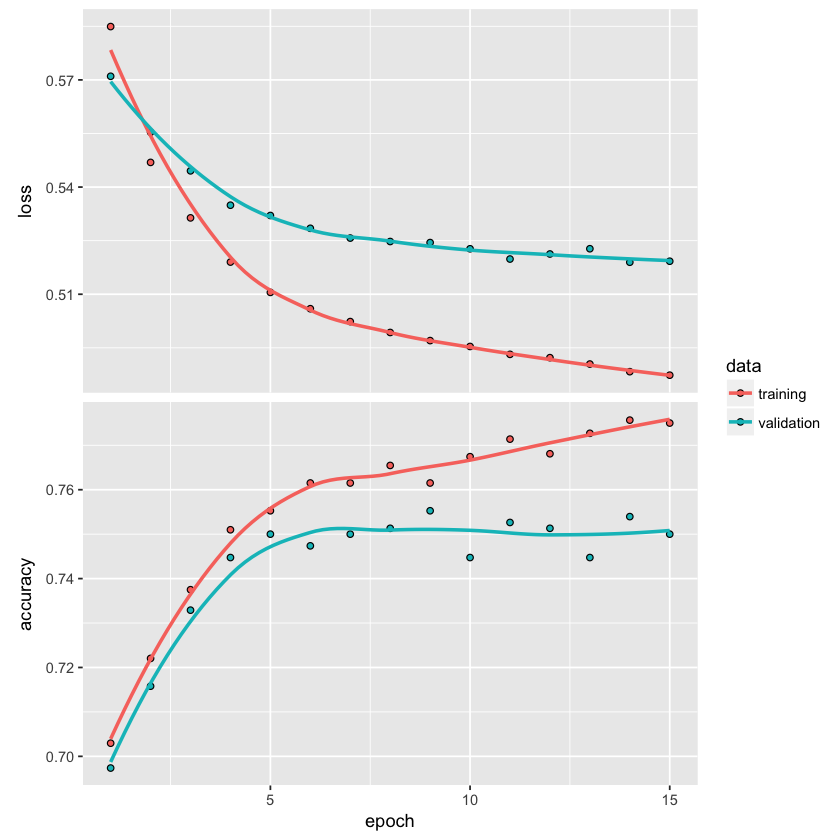

In [269]:
plot(history)

In [270]:
pred=predict(model,as.matrix(Testset[,-ncol(Testset)]))

In [271]:
truelabels=ifelse(Testset[,ncol(Trainset)]=='sane',0,1)
tb=table(round(pred),truelabels)
accuracy = sum(diag(tb))/sum(tb)
tb
accuracy

   truelabels
      0   1
  0 757 235
  1  64 144

[1] 0.7508333

# Final step : stacking using CaretEnsemble and the above estimated C-V hyperparameters

https://machinelearningmastery.com/machine-learning-ensembles-with-r/

https://cran.r-project.org/web/packages/caretEnsemble/vignettes/caretEnsemble-intro.html

https://topepo.github.io/caret/train-models-by-tag.html

https://www.r-bloggers.com/caretensemble-classification-example/

# Take entire dataset here

In [11]:
Trainset$VF<-as.factor(Trainset$VF)
Testset$VF<-as.factor(Testset$VF)
levels(Trainset$VF)<-c("sane","VF")
levels(Testset$VF)<-c("sane","VF")

Allset=rbind(Trainset,Testset)

Allset.X=Allset[,-ncol(Allset)]
Allset.Y=Allset[,ncol(Allset)]

In [12]:
NO.Allset=Allset[-c(4026,1754,1832,4889),]
NO.Allset.X=Allset.X[-c(4026,1754,1832,4889),]
NO.Allset.Y=Allset.Y[-c(4026,1754,1832,4889)]
#length(NO.Allset.Y)

In [13]:
dim(NO.Allset)

[1] 4996   19

# 2 CARET ensembles with finetuning (repeated cross-validation with Nfolds=20,repeat=3)

In [ ]:
#install.packages("e1071")
library(glmnet)
library(kernlab)
library(naivebayes)
library(mlbench)
library(caret)
library(caretEnsemble)
library(e1071)

#head(Trainset)

my_control = trainControl(
  method="repeatedcv", 
  number=5,
  repeats=3,
  savePredictions="final",
  classProbs=TRUE,
  #index=createResample(Trainset$VF,25),
  summaryFunction=twoClassSummary)

set.seed(21)

model_list_1 = caretList(
    
  VF~., data=NO.Allset,
  trControl=my_control,
  metric="ROC",

    tuneList=list(
    # Xgboost
    xgbTree = caretModelSpec(method="xgbTree", tuneGrid=expand.grid(nrounds=100, max_depth=10, eta=0.1, gamma=0.05, colsample_bytree=1,
    min_child_weight=1, subsample=0.8)),
    # GLMNET (removed because too much correlation / bad specificity)
    glmnet=caretModelSpec(method="glmnet",tuneGrid=data.frame(alpha=0,lambda=0.0154)),
    # KNN
    knn = caretModelSpec(method="knn", tuneGrid=data.frame(k=9)),
    # Neural network
    nnet = caretModelSpec(method="nnet", tuneGrid=data.frame(size = 16, decay = 0.2058567)),
    # Naive Bayes
    naive_bayes = caretModelSpec(method="naive_bayes", tuneGrid=data.frame(laplace = 0, usekernel = TRUE,adjust = 1)),
    # QDA (removed because too much correlation / bad specificity)
    qda = caretModelSpec(method="qda")
        
  )
    )

set.seed(22)
model_list_2 = caretList(
    
  VF~., data=NO.Allset,
  trControl=my_control,
  metric="ROC",

    tuneList=list(
        
    # Random forest
    rf = caretModelSpec(method="rf", tuneGrid=data.frame(.mtry=2)),
    # Adabag (removed because too much correlation / bad specificity)
    AdaBag = caretModelSpec(method="AdaBag", tuneGrid=data.frame(mfinal= 38, maxdepth = 30)),
    # SVM
    svmRadial = caretModelSpec(method="svmRadial", tuneGrid=data.frame(sigma=0.1,C=2)),
    # pcaNNet
    pcaNNet = caretModelSpec(method="pcaNNet",tuneGrid=data.frame(size = 9, decay = 0.03879114)),
    # Bayes GLM
    bayesglm = caretModelSpec(method="bayesglm")
        
  )
    )
    

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-10


Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha

Loading required package: lattice
Warning message:
“Installed Rcpp (1.0.1) different from Rcpp used to build dplyr (0.12.11).
Please reinstall dplyr to avoid random crashes or undefined behavior.”

In [67]:
results1=resamples(model_list_1)
summary(results1)

results2=resamples(model_list_2)
summary(results2)


Call:
summary.resamples(object = results1)

Models: xgbTree, glmnet, knn, nnet, naive_bayes, qda 
Number of resamples: 15 

ROC 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
xgbTree     0.8103664 0.8217060 0.8255580 0.8284592 0.8378215 0.8487415    0
glmnet      0.7399429 0.7696865 0.7784545 0.7751427 0.7854119 0.7919228    0
knn         0.7972161 0.8125682 0.8244297 0.8224101 0.8301097 0.8477463    0
nnet        0.7651097 0.7729772 0.7840556 0.7871282 0.7972471 0.8216766    0
naive_bayes 0.7113892 0.7435010 0.7500759 0.7489224 0.7606456 0.7706029    0
qda         0.7353270 0.7616553 0.7660024 0.7677670 0.7801909 0.7904135    0

Sens 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
xgbTree     0.8938307 0.9089600 0.9139168 0.9178891 0.9319022 0.9411765    0
glmnet      0.8911175 0.9060258 0.9169054 0.9149219 0.9218643 0.9397418    0
knn         0.8923960 0.9068768 0.9126074 0.9104292 0.9160689 0.9239598    0
nnet        0.83


Call:
summary.resamples(object = results2)

Models: rf, AdaBag, svmRadial, pcaNNet, bayesglm 
Number of resamples: 15 

ROC 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rf        0.8028354 0.8208417 0.8274422 0.8271141 0.8343333 0.8533806    0
AdaBag    0.7760465 0.7903769 0.7992033 0.7992949 0.8071215 0.8200867    0
svmRadial 0.8130921 0.8347174 0.8410976 0.8412874 0.8510479 0.8647942    0
pcaNNet   0.7493515 0.7592769 0.7644113 0.7665303 0.7693884 0.8058092    0
bayesglm  0.7383489 0.7696863 0.7751100 0.7751995 0.7836449 0.7958312    0

Sens 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rf        0.9226361 0.9455197 0.9483501 0.9512494 0.9612913 0.9670487    0
AdaBag    0.9053085 0.9132601 0.9196557 0.9199891 0.9239598 0.9383954    0
svmRadial 0.8853868 0.9103958 0.9210904 0.9181737 0.9268807 0.9397418    0
pcaNNet   0.8335725 0.8530470 0.8581662 0.8670350 0.8681013 1.0000000    0
bayesglm  0.8880918 0.8954155 0.9040115 0.

We see that models provide a good diversity in terms of sensitivity and specificity. Let's look at their correlation

In [76]:
modelCor(results1)

,xgbTree,glmnet,knn,nnet,naive_bayes,qda
xgbTree,1.0000000,0.8042941,0.8221070,0.8112440,0.6054745,0.7142027
glmnet,0.8042941,1.0000000,0.6286188,0.6330665,0.8590586,0.8627911
knn,0.8221070,0.6286188,1.0000000,0.7919733,0.3279184,0.5108798
nnet,0.8112440,0.6330665,0.7919733,1.0000000,0.4246581,0.7659797
naive_bayes,0.6054745,0.8590586,0.3279184,0.4246581,1.0000000,0.7783641
qda,0.7142027,0.8627911,0.5108798,0.7659797,0.7783641,1.0000000


In [69]:
modelCor(results2)

,rf,AdaBag,svmRadial,pcaNNet,bayesglm
rf,1.0000000,0.7704741,0.7004078,-0.0616869,0.6408723
AdaBag,0.7704741,1.0000000,0.4578986,-0.1684961,0.3975465
svmRadial,0.7004078,0.4578986,1.0000000,0.3440051,0.7422977
pcaNNet,-0.0616869,-0.1684961,0.3440051,1.0000000,0.3193253
bayesglm,0.6408723,0.3975465,0.7422977,0.3193253,1.0000000


# Best choice : stacking with GLMnet and bootstrap

In [70]:
# stack using GLM
set.seed(10)
stack.glm.btp = caretStack(model_list_1, method="glm", metric="ROC", 
                           
    trControl=trainControl(
    method="repeatedcv",
    number=5,
    repeats=3,
    savePredictions="final",
    classProbs=TRUE,
    summaryFunction=twoClassSummary
  )
                          )
print(stack.glm.btp)

A glm ensemble of 2 base models: xgbTree, glmnet, knn, nnet, naive_bayes, qda

Ensemble results:
Generalized Linear Model 

14988 samples
    6 predictor
    2 classes: 'sane', 'VF' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 11989, 11990, 11991, 11991, 11991, 11990, ... 
Resampling results:

  ROC        Sens      Spec     
  0.8577191  0.912787  0.5766861



In [71]:
# stack using GLM
set.seed(10)
stack.glm.btp = caretStack(model_list_2, method="glm", metric="ROC", 
                           
    trControl=trainControl(
    method="repeatedcv",
    number=5,
    repeats=3,
    savePredictions="final",
    classProbs=TRUE,
    summaryFunction=twoClassSummary
  )
                          )
print(stack.glm.btp)

A glm ensemble of 2 base models: rf, AdaBag, svmRadial, pcaNNet, bayesglm

Ensemble results:
Generalized Linear Model 

14988 samples
    5 predictor
    2 classes: 'sane', 'VF' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 11989, 11990, 11991, 11991, 11991, 11990, ... 
Resampling results:

  ROC        Sens       Spec     
  0.8522083  0.9187138  0.5747739



# TODO: Prediction accuracy on training set

# Caret single ensemble, all models

In [15]:
#install.packages("e1071")
library(glmnet)
library(kernlab)
library(naivebayes)
library(mlbench)
library(caret)
library(caretEnsemble)
library(e1071)

#head(Trainset)

my_control = trainControl(
  method="repeatedcv", 
  number=10,
  repeats=3,
  savePredictions="final",
  classProbs=TRUE,
  #index=createResample(Trainset$VF,25),
  summaryFunction=twoClassSummary)

set.seed(13)

model_list_3 = caretList(
    
  VF~., data=NO.Allset,
  trControl=my_control,
  metric="ROC",

    tuneList=list(
    # Xgboost
    xgbTree = caretModelSpec(method="xgbTree", tuneGrid=expand.grid(nrounds=100, max_depth=10, eta=0.1, gamma=0.05, colsample_bytree=1,
    min_child_weight=1, subsample=0.8)),
    # GLMNET
    glmnet=caretModelSpec(method="glmnet",tuneGrid=data.frame(alpha=0,lambda=0.0154)),
    # KNN
    knn = caretModelSpec(method="knn", tuneGrid=data.frame(k=9)),
    # Neural network
    nnet = caretModelSpec(method="nnet", tuneGrid=data.frame(size = 16, decay = 0.2058567)),
    # Naive Bayes
    naive_bayes = caretModelSpec(method="naive_bayes", tuneGrid=data.frame(laplace = 0, usekernel = TRUE,adjust = 1)),
    # QDA
    qda = caretModelSpec(method="qda"),
    # Random forest
    rf = caretModelSpec(method="rf", tuneGrid=data.frame(.mtry=2)),
    # Adabag (removed because too much correlation / bad specificity)
    #AdaBag = caretModelSpec(method="AdaBag", tuneGrid=data.frame(mfinal= 38, maxdepth = 30)),
    # SVM
    svmRadial = caretModelSpec(method="svmRadial", tuneGrid=data.frame(sigma=0.1,C=2)),
    # pcaNNet
    pcaNNet = caretModelSpec(method="pcaNNet",tuneGrid=data.frame(size = 9, decay = 0.03879114))
    # Bayes GLM
    #bayesglm = caretModelSpec(method="bayesglm")
        
  )
    )
    


Attaching package: ‘caretEnsemble’

The following object is masked from ‘package:ggplot2’:

    autoplot

Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”

In [16]:
results3=resamples(model_list_3)
summary(results3)


Call:
summary.resamples(object = results3)

Models: xgbTree, glmnet, knn, nnet, naive_bayes, qda, rf, svmRadial, pcaNNet 
Number of resamples: 30 

ROC 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
xgbTree     0.7987364 0.8204261 0.8303668 0.8295695 0.8364926 0.8607559    0
glmnet      0.7216830 0.7614454 0.7760212 0.7739375 0.7890425 0.8032656    0
knn         0.7980891 0.8170609 0.8298355 0.8282378 0.8397764 0.8562971    0
nnet        0.7456688 0.7727613 0.7880967 0.7871003 0.8027039 0.8367588    0
naive_bayes 0.6838700 0.7401374 0.7475948 0.7486894 0.7563867 0.8007726    0
qda         0.7159549 0.7619594 0.7729531 0.7685420 0.7840107 0.8054541    0
rf          0.7945307 0.8189490 0.8297329 0.8291217 0.8393589 0.8703852    0
svmRadial   0.8077193 0.8391474 0.8494184 0.8464251 0.8547174 0.8838966    0
pcaNNet     0.7327653 0.7592317 0.7710056 0.7709540 0.7821925 0.7981845    0

Sens 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Ma

In [17]:
modelCor(results3)

,xgbTree,glmnet,knn,nnet,naive_bayes,qda,rf,svmRadial,pcaNNet
xgbTree,1.0000000,0.6801144,0.6458133,0.4008723,0.5130601,0.6845823,0.8338104,0.6969630,0.4803311
glmnet,0.6801144,1.0000000,0.5829627,0.5129254,0.7509823,0.8483529,0.7711499,0.3778640,0.6660975
knn,0.6458133,0.5829627,1.0000000,0.6052640,0.4544122,0.4824208,0.6606022,0.7007660,0.5130227
nnet,0.4008723,0.5129254,0.6052640,1.0000000,0.4275872,0.3519690,0.5078446,0.4990671,0.4687450
naive_bayes,0.5130601,0.7509823,0.4544122,0.4275872,1.0000000,0.5350042,0.7755382,0.3520875,0.6790392
qda,0.6845823,0.8483529,0.4824208,0.3519690,0.5350042,1.0000000,0.6656781,0.4718321,0.5981744
rf,0.8338104,0.7711499,0.6606022,0.5078446,0.7755382,0.6656781,1.0000000,0.7002947,0.6456396
svmRadial,0.6969630,0.3778640,0.7007660,0.4990671,0.3520875,0.4718321,0.7002947,1.0000000,0.4278215
pcaNNet,0.4803311,0.6660975,0.5130227,0.4687450,0.6790392,0.5981744,0.6456396,0.4278215,1.0000000


# Stacking all

In [28]:
# stack using GLM
set.seed(10)
stack.glm.btp = caretStack(model_list_3, method="glm", metric="ROC", 
                           
    trControl=trainControl(
    method="boot",
    number=20,
    savePredictions="final",
    classProbs=TRUE,
    summaryFunction=twoClassSummary
  )
                          )
print(stack.glm.btp)

A glm ensemble of 2 base models: xgbTree, glmnet, knn, nnet, naive_bayes, qda, rf, svmRadial, pcaNNet

Ensemble results:
Generalized Linear Model 

14988 samples
    9 predictor
    2 classes: 'sane', 'VF' 

No pre-processing
Resampling: Bootstrapped (20 reps) 
Summary of sample sizes: 14988, 14988, 14988, 14988, 14988, 14988, ... 
Resampling results:

  ROC        Sens       Spec     
  0.8706692  0.9167637  0.6064426



In [19]:
# stack using RF
set.seed(10)
stack.glm.btp.rf = caretStack(model_list_3, method="rf", metric="ROC", 
                           
    trControl=trainControl(
    method="boot",
    number=10,
    savePredictions="final",
    classProbs=TRUE,
    summaryFunction=twoClassSummary
  )
                          )
print(stack.glm.btp.rf)

A rf ensemble of 2 base models: xgbTree, glmnet, knn, nnet, naive_bayes, qda, rf, svmRadial, pcaNNet

Ensemble results:
Random Forest 

14988 samples
    9 predictor
    2 classes: 'sane', 'VF' 

No pre-processing
Resampling: Bootstrapped (10 reps) 
Summary of sample sizes: 14988, 14988, 14988, 14988, 14988, 14988, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
  2     0.8901864  0.9210630  0.6402601
  5     0.8889823  0.9201139  0.6477912
  9     0.8853262  0.9171636  0.6459856

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


In [20]:
# Using gbm
set.seed(10)
stack.glm.btp.gbm = caretStack(model_list_3, method="gbm", metric="ROC", 
                           
    trControl=trainControl(
    method="boot",
    number=20,
    savePredictions="final",
    classProbs=TRUE,
    summaryFunction=twoClassSummary
  )
                          )
print(stack.glm.btp.gbm)

A gbm ensemble of 2 base models: xgbTree, glmnet, knn, nnet, naive_bayes, qda, rf, svmRadial, pcaNNet

Ensemble results:
Stochastic Gradient Boosting 

14988 samples
    9 predictor
    2 classes: 'sane', 'VF' 

No pre-processing
Resampling: Bootstrapped (20 reps) 
Summary of sample sizes: 14988, 14988, 14988, 14988, 14988, 14988, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  ROC        Sens       Spec     
  1                   50      0.8663407  0.9057841  0.6096216
  1                  100      0.8695451  0.9063069  0.6171720
  1                  150      0.8709316  0.9083202  0.6193938
  2                   50      0.8699156  0.9103723  0.6135134
  2                  100      0.8731942  0.9113865  0.6223572
  2                  150      0.8741170  0.9120866  0.6218774
  3                   50      0.8725698  0.9116493  0.6219469
  3                  100      0.8749071  0.9132458  0.6256159
  3                  150      0.8756323  0.9134468  0.6249

In [21]:
# Using glmnet
set.seed(10)
stack.glm.btp.glmnet = caretStack(model_list_3, method="glmnet", metric="ROC", 
                           
    trControl=trainControl(
    method="boot",
    number=20,
    savePredictions="final",
    classProbs=TRUE,
    summaryFunction=twoClassSummary
  )
                          )
print(stack.glm.btp.glmnet)

A glmnet ensemble of 2 base models: xgbTree, glmnet, knn, nnet, naive_bayes, qda, rf, svmRadial, pcaNNet

Ensemble results:
glmnet 

14988 samples
    9 predictor
    2 classes: 'sane', 'VF' 

No pre-processing
Resampling: Bootstrapped (20 reps) 
Summary of sample sizes: 14988, 14988, 14988, 14988, 14988, 14988, ... 
Resampling results across tuning parameters:

  alpha  lambda        ROC        Sens       Spec     
  0.10   0.0005449646  0.8707966  0.9175439  0.6059522
  0.10   0.0054496456  0.8709760  0.9195027  0.5993256
  0.10   0.0544964558  0.8669535  0.9245747  0.5655443
  0.55   0.0005449646  0.8707967  0.9174783  0.6055328
  0.55   0.0054496456  0.8708564  0.9197414  0.5962897
  0.55   0.0544964558  0.8668879  0.9310196  0.5463426
  1.00   0.0005449646  0.8707950  0.9174254  0.6056270
  1.00   0.0054496456  0.8704352  0.9198964  0.5927675
  1.00   0.0544964558  0.8668686  0.9360528  0.5255136

ROC was used to select the optimal model using the largest value.
The final values u

# FINAL RESULTS : Test data processing

In [22]:
Test=read.csv("test.csv")

# Data cleaning
Test$gender=ifelse(Test$gender=="M",1,0)
Test$education=ifelse(Test$education=="< high school",0,ifelse(Test$education=="high school",1,2))

Test$test3=ifelse(Test$test3=="Positive",1,0)
Test$test4=ifelse(Test$test4=="Positive",1,0)
Test$test5=ifelse(Test$test5=="Positive",1,0)
Test$test6=ifelse(Test$test6=="Positive",1,0)
Test$test7=ifelse(Test$test7=="Positive",1,0)
Test$test8=ifelse(Test$test8=="Positive",1,0)
Test$test9=ifelse(Test$test9=="Positive",1,0)
Test$test10=ifelse(Test$test10=="Positive",1,0)



scaled=scale(Test)
Test=scaled
head(Test)

ID,CD4_count_Now,CD4Count_6months_ago,test1,test2,CD4Percent_Now,CD4perc_6months_ago,age,TimeOnTherapy,gender,education,test3,test4,test5,test6,test7,test8,test9,test10
-1.731401,0.6176754,-0.07385993,0.63072412,-0.5931627,0.09559540,0.48876037,-1.4575681,1.3012620,-1.1761991,-1.43206374,-0.5911347,0.9496416,1.3954181,0.7341108,-0.7952955,-1.3005257,1.275143,0.8270668
-1.730535,-0.3336428,-0.26889978,-1.27956707,0.5090341,0.79471675,2.18279595,-0.7534459,0.7223812,0.8499837,-1.43206374,-0.5911347,0.9496416,-0.7164519,0.7341108,-0.7952955,-1.3005257,-0.784030,-1.2087899
-1.729670,3.0328589,1.77279394,0.05184800,-0.3865008,-0.06501356,1.59897578,-0.3093073,0.8877757,-1.1761991,-0.08233354,1.6912388,0.9496416,-0.7164519,0.7341108,1.2570799,0.7687276,-0.784030,0.8270668
-1.728804,-0.9704436,-0.93286521,-0.06392722,1.1290197,-1.07590525,-1.39669166,-0.9159357,-1.8412337,0.8499837,-0.08233354,-0.5911347,-1.0527656,-0.7164519,-1.3618516,-0.7952955,0.7687276,1.275143,0.8270668
-1.727938,-0.7724141,-0.25645043,1.61481353,-1.0064864,0.05780505,-0.10463062,-0.8292745,0.6396839,0.8499837,-0.08233354,1.6912388,-1.0527656,1.3954181,0.7341108,-0.7952955,0.7687276,-0.784030,-1.2087899
-1.727072,-0.1977402,0.31621976,0.82368283,1.0945761,1.11593467,-0.06634733,0.6439658,0.5569867,-1.1761991,-1.43206374,-0.5911347,-1.0527656,-0.7164519,-1.3618516,1.2570799,0.7687276,-0.784030,0.8270668


# Prediction results on Test data

In [29]:
# RF
pred = predict(stack.glm.btp,Test)

In [30]:
pred=ifelse(pred=='sane',0,1)

In [32]:
#pred

In [33]:
write.table(pred,"LAST.GLM.csv")

# Results on test data so far

### Rank 1 : GLM stacking 9 models with bootstrap  : 0.844
### RANK 2 : GLM stacking 5 models with C-V  : 0.837
### RANK 3 : GLM stacking 6 models with C-V  : 0.831
### RANK 4 : RF 9 stacking models with C-V  : 83.1
### RANK 5 : XGB 9 stacking models with C-V  : 83.6
### RANK 6 : RF 6 stacking models with C-V  : 0.824

### GLM stacking uncorrelated with  bootstrap : ?
### GLM stacking uncorrelated with bootstrap (remove RF): ?

We observe that tree-based models overtfit on the train set. I will use GLM with bootstrap cross-validation and look for the best combination of models to use.